```{contents}
```

## Handle Overfitting

### Define the Linear Regression Model

We start with the standard linear regression equation:

$$
\hat{y} = X\beta + \epsilon
$$

where:

* $X$ = input features
* $\beta$ = coefficients
* $\epsilon$ = error term

---

### Define the Cost Function

* Standard regression uses **Mean Squared Error (MSE):**

$$
J(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

* Regularization adds a **penalty term** to control complexity:

1. **Ridge (L2 Regularization):**

   $$
   J(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
   $$

   * Shrinks coefficients but never makes them exactly zero.
   * Helps with **multicollinearity**.

2. **Lasso (L1 Regularization):**

   $$
   J(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j|
   $$

   * Can shrink some coefficients exactly to **zero** → feature selection.

3. **Elastic Net (Combination of L1 & L2):**

   $$
   J(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \Big(\alpha \sum_{j=1}^p |\beta_j| + (1-\alpha) \sum_{j=1}^p \beta_j^2 \Big)
   $$

   * Balances Ridge and Lasso.
   * Good for **high-dimensional datasets (p >> n)**.

---

### Choose Hyperparameters

* **$\lambda$ (regularization strength)**: Controls penalty size.
* **$\alpha$ (for Elastic Net only)**: Balances L1 vs L2 penalty.

---

### Optimization

* Use **Gradient Descent** (or specialized solvers like Coordinate Descent for Lasso).
* Iteratively update coefficients:

$$
\beta_j \leftarrow \beta_j - \eta \cdot \frac{\partial J}{\partial \beta_j}
$$

where $\eta$ is the learning rate.

---

### Model Training

* Fit model on training data.
* Coefficients shrink depending on the regularization.

  * Ridge → small but nonzero.
  * Lasso → some zero.
  * Elastic Net → mix.

---

### Model Validation (Cross-Validation)

* Use **k-Fold CV** to tune $\lambda$ (and $\alpha$ for Elastic Net).
* Select the value that minimizes validation error.

---

### Prediction

* Use the final model to make predictions:

$$
\hat{y}_{test} = X_{test}\beta
$$

---

**Summary Workflow**

1. Define regression model.
2. Add regularization term (L1, L2, or both).
3. Choose hyperparameters ($\lambda$, $\alpha$).
4. Optimize using gradient descent/coordinate descent.
5. Train model → shrink/zero coefficients.
6. Validate via CV and tune parameters.
7. Predict on new data.


Ridge best alpha: {'alpha': 10}
Lasso best alpha: {'alpha': 0.1}
ElasticNet best params: {'alpha': 0.1, 'l1_ratio': 0.2}
Ridge MSE: 17.672667414984858
Lasso MSE: 17.58749667387544
ElasticNet MSE: 17.631499149830997


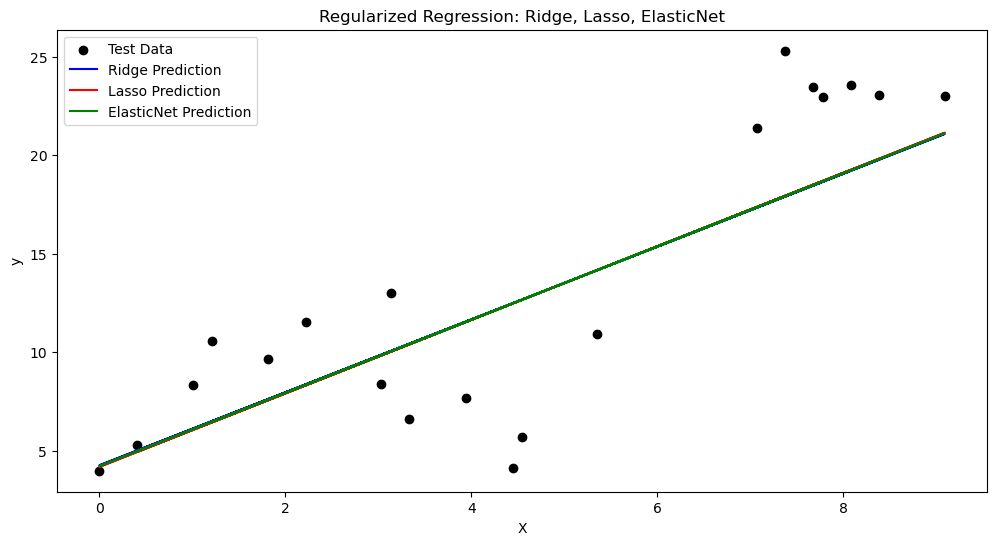

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 + 2 * X.flatten() + np.sin(X.flatten()) * 5 + np.random.normal(0, 2, size=X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression with cross-validation
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_
y_ridge_pred = ridge_best.predict(X_test)

# Lasso Regression with cross-validation
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_
y_lasso_pred = lasso_best.predict(X_test)

# Elastic Net Regression with cross-validation
enet_params = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
enet_cv = GridSearchCV(ElasticNet(max_iter=10000), enet_params, cv=5, scoring='neg_mean_squared_error')
enet_cv.fit(X_train, y_train)
enet_best = enet_cv.best_estimator_
y_enet_pred = enet_best.predict(X_test)

# Compare results
print('Ridge best alpha:', ridge_cv.best_params_)
print('Lasso best alpha:', lasso_cv.best_params_)
print('ElasticNet best params:', enet_cv.best_params_)
print('Ridge MSE:', mean_squared_error(y_test, y_ridge_pred))
print('Lasso MSE:', mean_squared_error(y_test, y_lasso_pred))
print('ElasticNet MSE:', mean_squared_error(y_test, y_enet_pred))

# Plot predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.plot(X_test, y_ridge_pred, color='blue', label='Ridge Prediction')
plt.plot(X_test, y_lasso_pred, color='red', label='Lasso Prediction')
plt.plot(X_test, y_enet_pred, color='green', label='ElasticNet Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regularized Regression: Ridge, Lasso, ElasticNet')
plt.legend()
plt.show()